<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/02_Regression_Tree_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1.**

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df[['date']].value_counts()

date           
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140830T000000      1
20141130T000000      1
20150524T000000      1
20141102T000000      1
20150527T000000      1
Length: 372, dtype: int64

In [5]:
# From https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e
spec_chars = ['T000000'] 
for char in spec_chars:
    df['date'] = df['date'].str.replace(char, '')
df    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
pd.to_numeric(df['date'], downcast="integer")

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: int32

In [7]:
# Assign your target vector and features matrix
y = df['price']
X = df.drop(columns = 'price')

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1) Run a regression tree model with default parameters (unlimited depth)

In [9]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [10]:
# Fitting the model 
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [11]:
# Prediction
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [12]:
# Evaluating the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.7220750615411665


We can see, that the model is overfit.  

2) Determine the depth of the default tree.

In [13]:
# The depth of default tree
dec_tree.get_depth()

36

3) Optimize the max_depth based on the R2 score.

In [14]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.9774188751214955
0.7377375381030574


Random depth of 15 gives us a little bit better result for test score.

In [15]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

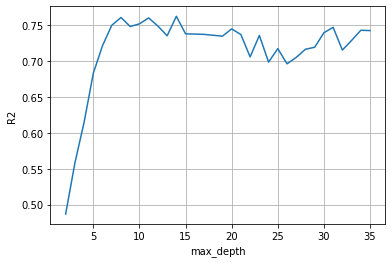

In [16]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('R2');

It looks like the best score for the model is when the parameter max_depth is 14. 

4) What is the r2 of your final model on the training set and on the test set?

In [17]:
# Running the model with 14 value
dec_tree_14 = DecisionTreeRegressor(max_depth = 14, random_state = 42)
dec_tree_14.fit(X_train, y_train)
train_14_score = dec_tree_14.score(X_train, y_train)
test_14_score = dec_tree_14.score(X_test, y_test)
print(train_14_score)
print(test_14_score)

0.9691621921020902
0.7620715330210402


The training and test results have moved closer and test set is higher.

**Part 2.**


1) Bagged trees

In [18]:
from sklearn.ensemble import BaggingRegressor

In [19]:
# Making an instance of the Model
bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [20]:
# Training the model on the data
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [21]:
# Predicting the values for y
bagreg.predict(X_test)

array([ 375005.,  824700., 1073600., ...,  277440., 1946200.,  314935.])

In [22]:
# Evaluating model performance
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9756131465787371
0.8610400352708689


Using Bagging Trees improved our test and train scores. 

2) Random forest regression techniques on the dataset to predict price from its its features. 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Making an instance of the Model
rf = RandomForestRegressor(random_state = 42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
# Training the model on the data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
# Predicting the values for y
rf.predict(X_test)

array([ 378533.5 ,  862554.02, 1108056.9 , ...,  281742.89, 1922474.5 ,
        324036.26])

In [27]:
# Evaluating model performance
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9830784668565605
0.868610332873508


Using Random Forest increase your train score by 0.008 and test score by 0.007 which is a slight difference, but stii a progress.

In [28]:
# The depth of each tree
depth = np.array([estimator.get_depth() for estimator in rf.estimators_])
depth

array([35, 35, 35, 32, 34, 37, 32, 35, 33, 35, 33, 34, 37, 32, 33, 32, 32,
       31, 36, 35, 31, 34, 38, 33, 37, 33, 33, 32, 33, 31, 32, 33, 32, 32,
       35, 33, 30, 34, 32, 33, 37, 31, 32, 34, 34, 35, 35, 35, 31, 34, 34,
       32, 36, 32, 35, 30, 33, 33, 35, 32, 32, 36, 34, 34, 36, 35, 36, 35,
       34, 32, 35, 35, 37, 34, 35, 36, 37, 32, 32, 31, 33, 33, 34, 38, 33,
       33, 34, 34, 33, 36, 45, 32, 35, 32, 31, 41, 33, 34, 34, 37])

In [32]:
max_depth_range = list(range(2, 45))

r2 = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

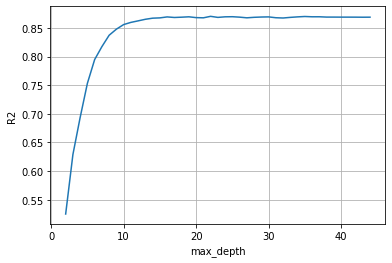

In [33]:
plt.plot(max_depth_range, r2)
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('R2');

It looks like the score doesn't really change much depending on max_depth. We can try 22 to see if it's gonna give us better results.

In [34]:
# Running the model with 22 value
rf_22 = RandomForestRegressor(max_depth = 22, random_state = 42)
rf_22.fit(X_train, y_train)
rf_22_train_score = rf_22.score(X_train, y_train)
rf_22_test_score = rf_22.score(X_test, y_test)
print(rf_22_train_score)
print(rf_22_test_score)



0.9827135367926777
0.8700769732654854


Using max depth of 22 slightly increasing test score and slightly decreasing train score, therefore bring them closer, which gives as more accurate result.